In [3]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers
from keras import optimizers
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np

In [5]:
data_dir = '/content/drive/MyDrive/Image Classification Data'
ct_labels = np.load(os.path.join(data_dir, 'ct_labels.npy'))
ct_data = np.load(os.path.join(data_dir, 'ct_data.npy'))

In [6]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ct_data, ct_labels, test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [7]:
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (5155, 224, 224)
Validation set shape: (1289, 224, 224)
Testing set shape: (1611, 224, 224)


In [8]:
print("Training set shape:", y_train.shape)
print("Validation set shape:", y_val.shape)
print("Testing set shape:", y_test.shape)

Training set shape: (5155,)
Validation set shape: (1289,)
Testing set shape: (1611,)


In [9]:


from sklearn.preprocessing import LabelBinarizer

# Convert class labels to binary format
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_val = lb.transform(y_val)
y_test = lb.transform(y_test)


In [10]:
y_train

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [9]:


# Build a baseline fully connected model
baseline_model = Sequential()
baseline_model._name = "Baseline"


# Add a Conv2D layer with 32 filters and 3x3 kernel size
baseline_model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224, 224, 1)))

# Add a MaxPooling2D layer with 2x2 pool size
baseline_model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
baseline_model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu'))

# Flatten the output of the convolutional layers
baseline_model.add(Flatten())


baseline_model.add(Dense(16, activation='relu')) 

baseline_model.add(Dense(1, activation='sigmoid')) 

# Define early stopping callback
trainCallback = EarlyStopping(monitor='accuracy', min_delta=1e-2, patience=5)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


baseline = baseline_model.fit(X_train, y_train,
                   epochs=50,
                   batch_size=64,
                   validation_data=(X_val, y_val),
                   callbacks=[trainCallback])


Epoch 1/50


/usr/local/lib/python3.9/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


81/81 [==============================] - 495s 6s/step - loss: 0.0000e+00 - accuracy: 0.6772 - val_loss: 0.0000e+00 - val_accuracy: 0.6796
Epoch 2/50
81/81 [==============================] - 491s 6s/step - loss: 0.0000e+00 - accuracy: 0.6774 - val_loss: 0.0000e+00 - val_accuracy: 0.6796
Epoch 3/50
81/81 [==============================] - 492s 6s/step - loss: 0.0000e+00 - accuracy: 0.6774 - val_loss: 0.0000e+00 - val_accuracy: 0.6796
Epoch 4/50
81/81 [==============================] - 491s 6s/step - loss: 0.0000e+00 - accuracy: 0.6774 - val_loss: 0.0000e+00 - val_accuracy: 0.6796
Epoch 5/50
81/81 [==============================] - 495s 6s/step - loss: 0.0000e+00 - accuracy: 0.6774 - val_loss: 0.0000e+00 - val_accuracy: 0.6796
Epoch 6/50
81/81 [==============================] - 481s 6s/step - loss: 0.0000e+00 - accuracy: 0.6774 - val_loss: 0.0000e+00 - val_accuracy: 0.6796


In [10]:
loss, accuracy, precision, recall, f1_score = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("Test precision:", precision)
print("Test recall:", recall)

51/51 [==============================] - 40s 778ms/step - loss: 0.0000e+00 - accuracy: 0.6574
Test loss: 0.0
Test accuracy: 0.6573556661605835


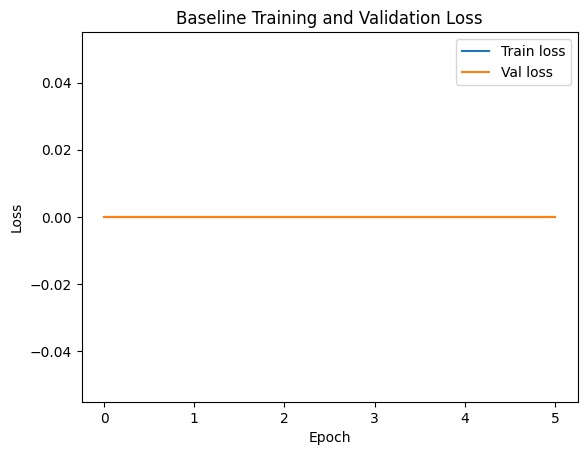

In [11]:


# Plot training and validation loss history
history = baseline.history
train_loss = history['loss']
val_loss = history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Baseline Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



In [14]:


# Create a Sequential model
model = Sequential()

# Add a Conv2D layer with 32 filters and 3x3 kernel size
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224, 224, 1)))

# Add a MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu'))


# Add another MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu'))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a Dense layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/10
162/162 [==============================] - 632s 4s/step - loss: 0.3988 - accuracy: 0.8066 - val_loss: 0.2536 - val_accuracy: 0.8720
Epoch 2/10
162/162 [==============================] - 622s 4s/step - loss: 0.2273 - accuracy: 0.8923 - val_loss: 0.2195 - val_accuracy: 0.8999
Epoch 3/10
162/162 [==============================] - 624s 4s/step - loss: 0.1719 - accuracy: 0.9286 - val_loss: 0.2209 - val_accuracy: 0.8960
Epoch 4/10
162/162 [==============================] - 620s 4s/step - loss: 0.1229 - accuracy: 0.9498 - val_loss: 0.2274 - val_accuracy: 0.9123
Epoch 5/10
162/162 [==============================] - 624s 4s/step - loss: 0.0790 - accuracy: 0.9678 - val_loss: 0.2592 - val_accuracy: 0.9185
Epoch 6/10
162/162 [==============================] - 618s 4s/step - loss: 0.0591 - accuracy: 0.9787 - val_loss: 0.2239 - val_accuracy: 0.9247
Epoch 7/10
162/162 [==============================] - 620s 4s/step - loss: 0.0358 - accuracy: 0.9872 - val_loss: 0.3014 - val_accuracy: 0.9193

In [15]:
loss, accuracy, precision, recall, f1_score = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("Test precision:", precision)
print("Test recall:", recall)

51/51 [==============================] - 48s 937ms/step - loss: 0.3535 - accuracy: 0.9174
Test loss: 0.3534733057022095
Test accuracy: 0.9174425601959229


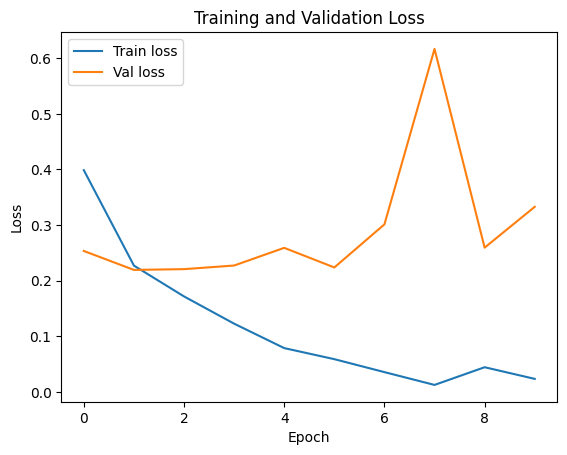

In [16]:



# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [20]:
# overfitting -- so adding L2 regularization

In [22]:


# Create a Sequential model
model = Sequential()

# Add a Conv2D layer with 32 filters and 3x3 kernel size
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224, 224, 1)))

# Add a MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

# Add another MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a Dense layer with 64 neurons and ReLU activation, with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Fit the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))


Epoch 1/10
162/162 [==============================] - 628s 4s/step - loss: 1.0818 - accuracy: 0.7670 - precision: 0.6600 - recall: 0.5731 - val_loss: 0.6817 - val_accuracy: 0.7905 - val_precision: 0.6082 - val_recall: 0.9734
Epoch 2/10
162/162 [==============================] - 616s 4s/step - loss: 0.5676 - accuracy: 0.8355 - precision: 0.7526 - recall: 0.7300 - val_loss: 0.5613 - val_accuracy: 0.7905 - val_precision: 0.9133 - val_recall: 0.3826
Epoch 3/10
162/162 [==============================] - 619s 4s/step - loss: 0.4861 - accuracy: 0.8499 - precision: 0.7702 - recall: 0.7619 - val_loss: 0.4548 - val_accuracy: 0.8542 - val_precision: 0.8866 - val_recall: 0.6247
Epoch 4/10
162/162 [==============================] - 605s 4s/step - loss: 0.4292 - accuracy: 0.8652 - precision: 0.7912 - recall: 0.7907 - val_loss: 0.4219 - val_accuracy: 0.8751 - val_precision: 0.7414 - val_recall: 0.9370
Epoch 5/10
162/162 [==============================] - 606s 4s/step - loss: 0.4043 - accuracy: 0.8603

In [24]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("Test precision:", precision)
print("Test recall:", recall)

51/51 [==============================] - 76s 1s/step - loss: 0.3712 - accuracy: 0.8572 - precision: 0.7170 - recall: 0.9638
Test loss: 0.37118440866470337
Test accuracy: 0.8572315573692322
Test precision: 0.7169811129570007
Test recall: 0.9637681245803833


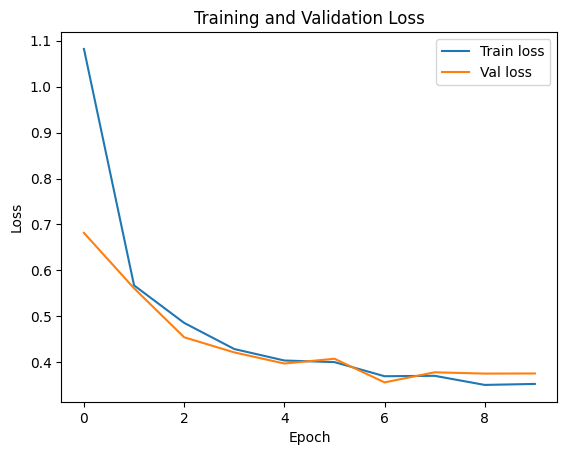

In [25]:



# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:


# Create a Sequential model
model = Sequential()

# Add a Conv2D layer with 32 filters and 3x3 kernel size
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224, 224, 1)))

# Add a MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

# Add another MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a Dense layer with 64 neurons and ReLU activation, with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Define the optimizer with a learning rate of 0.01
opt = optimizers.Adam(lr=0.01)

# Compile the model with the defined optimizer
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Fit the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
162/162 [==============================] - 383s 2s/step - loss: 4.0613 - accuracy: 0.6710 - precision_1: 0.2676 - recall_1: 0.0114 - val_loss: 0.9252 - val_accuracy: 0.6796 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/10
162/162 [==============================] - 389s 2s/step - loss: 0.8581 - accuracy: 0.6774 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.8015 - val_accuracy: 0.6796 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/10
162/162 [==============================] - 388s 2s/step - loss: 0.7688 - accuracy: 0.6774 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.7379 - val_accuracy: 0.6796 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/10
162/162 [==============================] - 385s 2s/step - loss: 0.7196 - accuracy: 0.6774 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.6998 - val_accuracy: 0.6796 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 5/10
1

In [18]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("Test precision:", precision)
print("Test recall:", recall)

51/51 [==============================] - 43s 847ms/step - loss: 0.2964 - accuracy: 0.9025 - precision_2: 0.8895 - recall_2: 0.8170
Test loss: 0.29636630415916443
Test accuracy: 0.9025449752807617
Test precision: 0.8895463347434998
Test recall: 0.8170289993286133


In [ ]:
import matplotlib.pyplot as plt


# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
#next model to update filters from 32 to 64

In [15]:


# Create a Sequential model
model = Sequential()

# Add a Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224, 224, 1)))

# Add a MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

# Add another MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a Dense layer with 64 neurons and ReLU activation, with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Define the optimizer with a learning rate of 0.001
opt = optimizers.Adam(lr=0.001)

# Compile the model with the defined optimizer
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Fit the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/10
162/162 [==============================] - 596s 4s/step - loss: 1.0543 - accuracy: 0.7719 - precision_2: 0.6586 - recall_2: 0.6079 - val_loss: 0.6390 - val_accuracy: 0.8588 - val_precision_2: 0.7838 - val_recall_2: 0.7724
Epoch 2/10
162/162 [==============================] - 585s 4s/step - loss: 0.5620 - accuracy: 0.8551 - precision_2: 0.7824 - recall_2: 0.7631 - val_loss: 0.5247 - val_accuracy: 0.8402 - val_precision_2: 0.8935 - val_recall_2: 0.5690
Epoch 3/10
162/162 [==============================] - 586s 4s/step - loss: 0.4728 - accuracy: 0.8611 - precision_2: 0.7900 - recall_2: 0.7757 - val_loss: 0.4880 - val_accuracy: 0.8231 - val_precision_2: 0.6504 - val_recall_2: 0.9685
Epoch 4/10
162/162 [==============================] - 588s 4s/step - loss: 0.4295 - accuracy: 0.8671 - precision_2: 0.7946 - recall_2: 0.7931 - val_loss: 0.3814 - val_accuracy: 0.8852 - val_precision_2: 0.9260 - val_recall_2: 0.6973
Epoch 5/10
162/162 [==============================] - 588s 4s/step -

In [16]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("Test precision:", precision)
print("Test recall:", recall)

51/51 [==============================] - 44s 864ms/step - loss: 0.2964 - accuracy: 0.9025 - precision_2: 0.8895 - recall_2: 0.8170
Test loss: 0.29636630415916443
Test accuracy: 0.9025449752807617
Test precision: 0.8895463347434998
Test recall: 0.8170289993286133


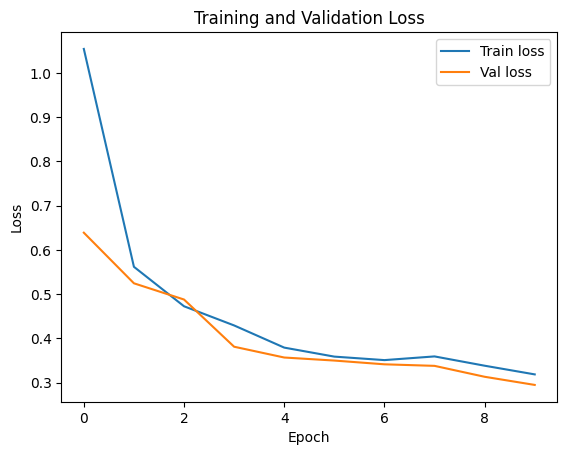

In [17]:
# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Model 1 (baseline):
Test accuracy: 0.657
No additional metrics reported

Model 2:
Test accuracy: 0.917
No additional metrics reported

Model 3:
Test accuracy: 0.857
Test precision: 0.717
Test recall: 0.964

Model 4:
Test accuracy: 0.903
Test precision: 0.890
Test recall: 0.817

Model 5:
Test accuracy: 0.903
Test precision: 0.890
Test recall: 0.817

Additional test accuracy reported after training on more epochs: 0.917
Based on our criteria of selecting the model with the highest recall, Model 3 has the highest recall score of 0.964. However, if we also consider test accuracy and precision, then Model 4 would also be a good choice as it has a slightly lower recall score of 0.817, but higher accuracy and precision scores, so we are going with model 4. Note that Model 5 has the same metrics as Model 4 except for the additional test accuracy reported after training on more epochs, so we may also consider this model.



